In [2]:
from src.FullFeatureSet import FullFeatureSet
from src.ManuallySelectedFeatureSet import ManuallySelectedFeatureSet
from src.PcaFeatureSet import PcaFeatureSet
from src.model_runner import SvmRunner
from src.uci_har_dataset import UciHarDataset
from sklearn.svm import SVC


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dataset = UciHarDataset()
full_features = FullFeatureSet(dataset)
manual_features = ManuallySelectedFeatureSet(dataset)
pca_features_80 = PcaFeatureSet(dataset, n_components=10)
pca_features_90 = PcaFeatureSet(dataset, n_components=34)
pca_features_95 = PcaFeatureSet(dataset, n_components=67)

Loaded activity labels from data/UCI-HAR Dataset//activity_labels.txt
{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
Loaded feature names from data/UCI-HAR Dataset//features.txt
Loaded features from data/UCI-HAR Dataset/train/X_train.txt. Shape: (7352, 561)
Loaded labels from data/UCI-HAR Dataset/train/y_train.txt. Shape: (7352, 1)
Loaded features from data/UCI-HAR Dataset/test/X_test.txt. Shape: (2947, 561)
Loaded labels from data/UCI-HAR Dataset/test/y_test.txt. Shape: (2947, 1)
Selected features: train. Shape: (7352, 15)
Selected features: test. Shape: (2947, 15)
Scaled features using StandardScaler.


Accuracy on Model: 0.9654

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.97       496
  WALKING_UPSTAIRS       0.95      0.96      0.96       471
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
           SITTING       0.98      0.90      0.94       491
          STANDING       0.92      0.98      0.95       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.97      0.97      0.97      2947



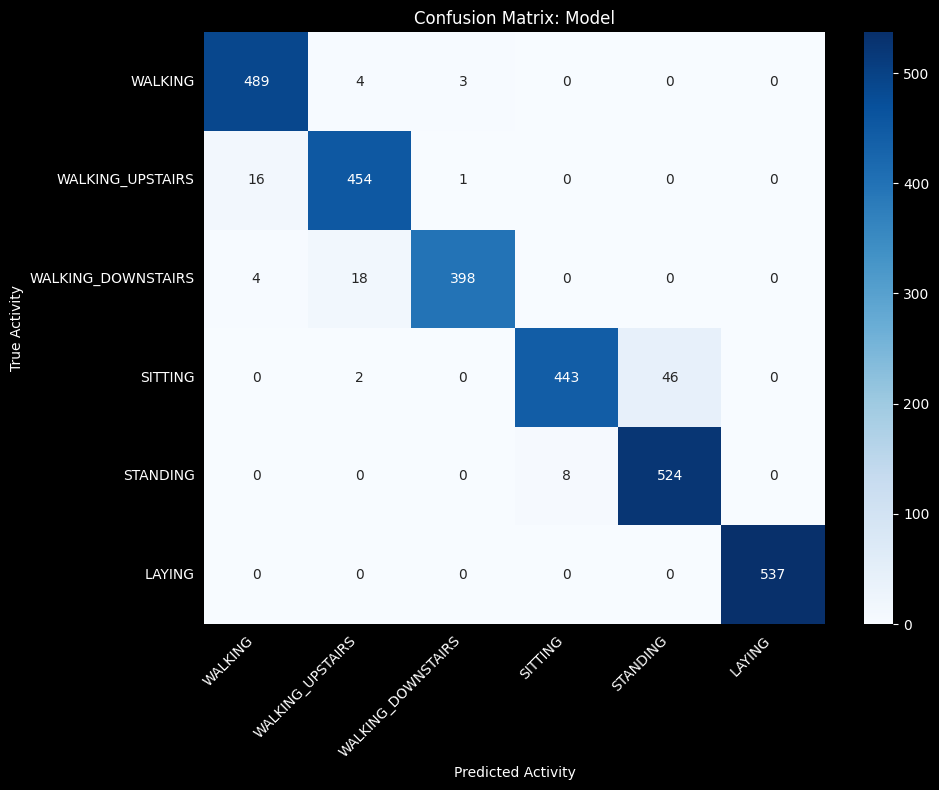

In [9]:
svm = SVC(kernel='rbf', C=100.0, gamma='scale')

runner = SvmRunner(dataset, feature_set=manual_features, model=svm)
runner.run()

runner.plot_confusion_matrix(filename="fig/svm_full_cm.svg")
# runner.plot_feature_importance()

Accuracy on Model: 0.8772

Classification Report:
                    precision    recall  f1-score   support

           WALKING       0.87      0.98      0.92       496
  WALKING_UPSTAIRS       0.90      0.90      0.90       471
WALKING_DOWNSTAIRS       0.93      0.80      0.86       420
           SITTING       0.81      0.72      0.76       491
          STANDING       0.77      0.87      0.82       532
            LAYING       1.00      0.98      0.99       537

          accuracy                           0.88      2947
         macro avg       0.88      0.87      0.88      2947
      weighted avg       0.88      0.88      0.88      2947



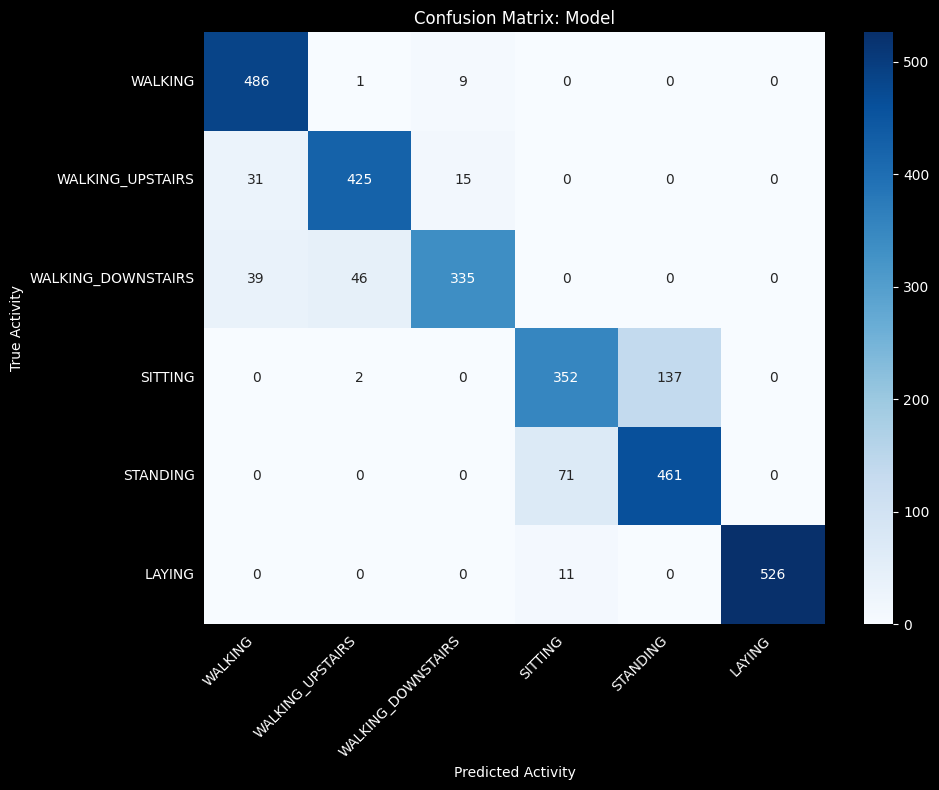

Calculating feature importance for Model...


AttributeError: 'PcaFeatureSet' object has no attribute 'MANUAL_FEATURE_SET'

In [12]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

runner = SvmRunner(dataset, feature_set=pca_features_80, model=svm)
runner.run()

runner.plot_confusion_matrix(filename="fig/svm_pca80_cm.svg")
runner.plot_feature_importance(filename="fig/svm_pca80_feature_importance.svg")

In [6]:
import itertools
from sklearn.svm import SVC

# 1. Initialize Dataset and Feature Sets
dataset = UciHarDataset()
feature_configs = {
    "Full (561)": FullFeatureSet(dataset),
    "Manual (15)": ManuallySelectedFeatureSet(dataset),
    "PCA (80%)": PcaFeatureSet(dataset, n_components=10),
    "PCA (90%)": PcaFeatureSet(dataset, n_components=34),
    "PCA (95%)": PcaFeatureSet(dataset, n_components=67)
}

# 2. Define Hyperparameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

results = []

for name, f_set in feature_configs.items():
    print(f"\n--- Grid Search: {name} ---")
    best_acc = 0
    best_params = None

    keys, values = zip(*param_grid.items())
    combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    for params in combinations:
        svm = SVC(**params)

        runner = SvmRunner(dataset, f_set, svm, name=f"{name} {params}")
        acc = runner.run(eval_set='test', verbose=False)

        if acc > best_acc:
            best_acc = acc
            best_params = params

    results.append({
        'feature_set_name': name,
        'best_accuracy': best_acc,
        'best_params': best_params,
        'feature_set_obj': f_set
    })

print("\n" + "="*30)
print("FINAL RESULTS")
print("="*30)

for res in results:
    print(f"Set: {res['feature_set_name']} | Best Acc: {res['best_accuracy']:.4f} | Params: {res['best_params']}")

    # Re-run the winner with full plots
    best_svm = SVC(**res['best_params'])
    final_runner = SvmRunner(dataset, res['feature_set_obj'], best_svm, name=res['feature_set_name'])
    final_runner.run()
    # final_runner.plot_confusion_matrix() # Uncomment if you want all plots at once

Loaded activity labels from data/UCI-HAR Dataset//activity_labels.txt
{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}
Loaded feature names from data/UCI-HAR Dataset//features.txt
Loaded features from data/UCI-HAR Dataset/train/X_train.txt. Shape: (7352, 561)
Loaded labels from data/UCI-HAR Dataset/train/y_train.txt. Shape: (7352, 1)
Loaded features from data/UCI-HAR Dataset/test/X_test.txt. Shape: (2947, 561)
Loaded labels from data/UCI-HAR Dataset/test/y_test.txt. Shape: (2947, 1)
Selected features: train. Shape: (7352, 15)
Selected features: test. Shape: (2947, 15)
Scaled features using StandardScaler.

--- Grid Search: Full (561) ---
Accuracy on Full (561) {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}: 0.9128
Accuracy on Full (561) {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}: 0.9230
Accuracy on Full (561) {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}: 0.8096
Accuracy on Full (561) {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}: 0.95